In [1]:
import numpy as np
import h5py
    
    
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [3]:
%matplotlib inline

In [4]:
from matplotlib import pyplot as plt

y = [1], it's a 'cat' picture.


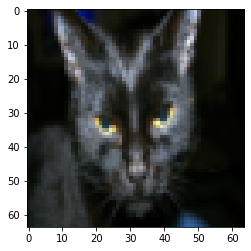

In [5]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [6]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [7]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = test_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [8]:

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape((m_train, -1)).T
test_set_x_flatten = test_set_x_orig.reshape((m_test, -1)).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [9]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [10]:
# GRADED FUNCTION: sigmoid
def sigmoid(z):

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [11]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [12]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1))
    b = 0.0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [13]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


In [14]:
w.shape

(2, 1)

In [15]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    #print(X.shape, w.shape)
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)  # compute activation
    #print(Y.shape, A.shape)
    cost = -1 / m * (np.dot(Y, np.log(A.T)) + np.dot((1 - Y), np.log(1 - A.T)))                              # compute cost
    ### END CODE HERE ###
    #print(A.shape)
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    #print(X.shape, Y.shape, A.shape)
    dw = -1 * 1/m * np.dot(X, (Y - A).T)
    db = -1 * 1/m * np.sum(Y - A, axis=1)
    ### END CODE HERE ###
    #print(dw.shape, w.shape)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    #print(cost.shape)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [16]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = [0.00145558]
cost = 5.801545319394553


In [17]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [18]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 5.801545
w = [[0.19033591]
 [0.12259159]]
b = [1.92535983]
dw = [[0.67752042]
 [1.41625495]]
db = [0.2191945]


In [19]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        print(A[0,i])
        if A[0, i] >= 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [20]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

0.5224197562625682
0.5096067700926029
0.34597965087838745
predictions = [[1. 1. 0.]]


In [21]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [22]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

0.9436698830369612
0.8609531091147995
0.8889671462821572
0.9363064057793109
0.7407540258589626
0.5284961891400344
0.03094677218658397
0.8570768062014934
0.8845792532454991
0.672796964926626
0.2660108482423609
0.48237940376786476
0.7474115721769923
0.7857572921247428
0.009789112891554584
0.9203284020621321
0.024536948632902924
0.8488470259369338
0.20502479989526665
0.03703224252151094
0.9293139190166886
0.11930532172473672
0.01411063672111744
0.7832698004804824
0.5818801453111279
0.6689756538511346
0.7511900721621687
0.01323557820815828
0.03402648687165156
0.9973511510103653
0.2103172678059832
0.7812322519606186
0.6815841974692963
0.46647604128980996
0.6632337494813818
0.03424828199594439
0.08031626750581868
0.7657065642590251
0.34760863381290263
0.06177742812858374
0.6987531024560741
0.41064259616250653
0.6648870975252652
0.027768680452017608
0.9305312507701995
0.4639571699686636
0.23971605185280884
0.9771734996839399
0.6620240665839718
0.104823883597443
0.19653333454114547
0.089751993

In [23]:
test_set_y.shape

(1, 50)

In [24]:
index=1
d["Y_prediction_test"][0,index]

1.0

In [33]:
classes[1]

b'cat'

y = 1, you predicted that it is a "cat" picture.


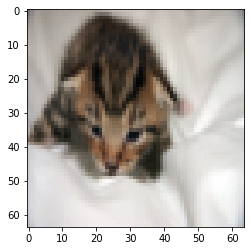

In [27]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

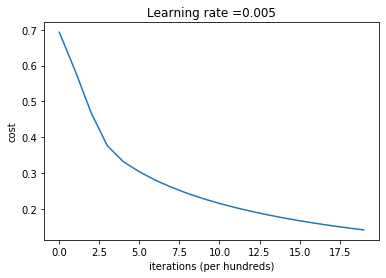

In [28]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
0.9712594329784945
0.9155338027693146
0.9207913224587844
0.9635804381681055
0.7892423400412261
0.604112972774896
0.011795270009128408
0.8981404837369933
0.9152285881193443
0.7026406521940194
0.1938038719409721
0.4953735465982054
0.7927164016926843
0.8542343110991726
0.0029858681139449408
0.9619969899188641
0.012347350564720024
0.9107653005993572
0.13661137475037713
0.014243358911169
0.9689473512979551
0.10337460356656748
0.005792966540152453
0.8608132629710668
0.5381119613768647
0.6495017815497608
0.832728425251661
0.004263069051478742
0.013145204476105595
0.9994780408048498
0.11468372212414309
0.8218244221011116
0.6961173303664012
0.499152201503388
0.6723140125186073
0.01728164614474304
0.04136098870690643
0.800696929231674
0.2683235852864071
0.03958565904116056
0.7473123941993618
0.3211643437655699
0.7187119694194575
0.012057251320661797
0.9687996248864402
0.6231036440599229
0.17737125752273952
0.9896052328570907
0.7469726536068836
0.07284605288022124
0.1478396

0.4509863457567963
0.4853948895522182
0.40959086939036166
0.4486425688194818
0.32818894239866214
0.4372976614734533
0.28884626118589574
0.4643807816321995
0.45494399053212264
0.45491704624362733
0.36938308937597975
0.4186367924535576
0.45816518851800664
0.503175503218969
0.2842568037788868
0.45155065214084095
0.30672370731778714
0.37824086144977753
0.2650554826363304
0.277379344865534
0.4067757627927803
0.28781554819590593
0.24304775059115166
0.3839779571784074
0.5064258132897843
0.4704784285499077
0.3535891597026936
0.3156149088608646
0.3943071383977328
0.4603234975847618
0.3799887896861645
0.3764821000889324
0.32056264356013353
0.3869308523224516
0.40764828328087077
0.231501193193115
0.311659003271604
0.4498114430216135
0.43152263181929684
0.2627673158212348
0.3778557461226893
0.488832821740459
0.3779079807988311
0.30969511665653554
0.4784290622915008
0.3285752868132123
0.3445707584631819
0.6054777543227186
0.4073322582198324
0.28828383181588646
0.4225818974700476
0.3169238940042171


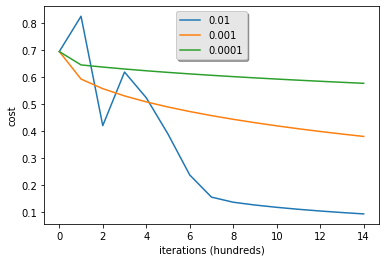

In [29]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [30]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "my_image.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
image = image/255.
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

NameError: name 'ndimage' is not defined